In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
df=pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
df.shape

(51717, 17)

In [17]:
df['listed_in(city)'].value_counts().count()

30

In [19]:
df['location'].value_counts().count()

93

#  **Listed_in city and location are indicative of the place, as listed_in(city) is few in count hence we are dropping location**

In [6]:
df.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [21]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [20]:
df1=df.drop(columns=['url','address','phone','dish_liked','menu_item','dish_liked','reviews_list','location'])

In [22]:
df1.shape

(51717, 10)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   rest_type                    51490 non-null  object
 6   cuisines                     51672 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(type)              51717 non-null  object
 9   listed_in(city)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [25]:
df1.drop_duplicates(inplace=True)

In [42]:
df1['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [36]:
def convert(value):
    if value=='NEW' or value==np.nan or value=='-':
        return np.nan
    elif isinstance(value,float):
        return value
        
    else:
        val=value.split('/')
        return float(val[0])
df1['rate']=df1['rate'].apply(convert)
                        

In [41]:
len(df1['rate'].value_counts())

31

In [43]:
df1['rate']=df1['rate'].fillna(value=df1['rate'].mean())

In [44]:
df1['rate'].isna().sum()

0

In [45]:
df1.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'cuisines', 'approx_cost(for two people)', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [55]:
df1['rest_type'].value_counts()

Quick Bites                   19094
Casual Dining                 10309
Cafe                           3727
Delivery                       2600
Dessert Parlor                 2247
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [54]:
df1.isna().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
rest_type                      227
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [56]:
df1.dropna(inplace=True)

In [59]:
df1.isna().sum().sum()

0

In [60]:
df1.rename(columns={'approx_cost(for two people)':'Cost2plates','listed_in(type)':'Type','listed_in(city)':'City'},inplace=True)

In [61]:
df1.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'cuisines', 'Cost2plates', 'Type', 'City'],
      dtype='object')

In [62]:
df1['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

# Should be converted to float or int and we have remove the ',' before converting it

In [63]:
def convert1(value):
    if ',' in value:
        value=value.replace(',','')
    return float(value)
df1['Cost2plates']=df1['Cost2plates'].apply(convert1)

In [65]:
df1['Cost2plates'].value_counts()

300.0     7520
400.0     6503
500.0     4929
200.0     4824
600.0     3687
          ... 
60.0         1
5000.0       1
3700.0       1
469.0        1
160.0        1
Name: Cost2plates, Length: 70, dtype: int64

# rest_type cleaning

In [71]:
res=df1['rest_type'].value_counts(ascending=True)

In [72]:
res_less_than_1k=res[res<1000]
res_less_than_1k

Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Dessert Parlor, Food Court      2
Food Court, Beverage Shop       2
Cafe, Food Court                2
                             ... 
Bar, Casual Dining            411
Sweet Shop                    468
Food Court                    616
Bar                           686
Beverage Shop                 863
Name: rest_type, Length: 85, dtype: int64

# Making less than 1000 as others

In [74]:
def res_ty(value):
    if(value in res_less_than_1k):
        return 'others'
    else:
        return value
df1['rest_type']=df1['rest_type'].apply(res_ty)

In [75]:
df1['rest_type'].value_counts()

Quick Bites           19008
Casual Dining         10253
others                 9002
Cafe                   3682
Delivery               2574
Dessert Parlor         2229
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

# Making less frequent located restaurants into a single group

In [79]:
loc=df1['City'].value_counts()

In [82]:
loc_less_300=loc[loc<300]

In [83]:
def loca(value):
    if(value in loc_less_300):
        return 'others'
    else:
        return value
df1['City']=df1['City'].apply(loca)

In [84]:
df1.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,Cost2plates,Type,City
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,others,"Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


# Cleaning Cuisines columns

In [88]:
cuisines=df1['cuisines'].value_counts(ascending=True)

In [89]:
cuisines_less_100=cuisines[cuisines<100]

In [90]:
def cuis(value):
    if value in cuisines_less_100:
        return 'others'
    else:
        return value
df1['cuisines']=df1['cuisines'].apply(cuis)

In [92]:
df1['cuisines'].value_counts()

others                                 26157
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

# Visualization

In [93]:
df1.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'cuisines', 'Cost2plates', 'Type', 'City'],
      dtype='object')

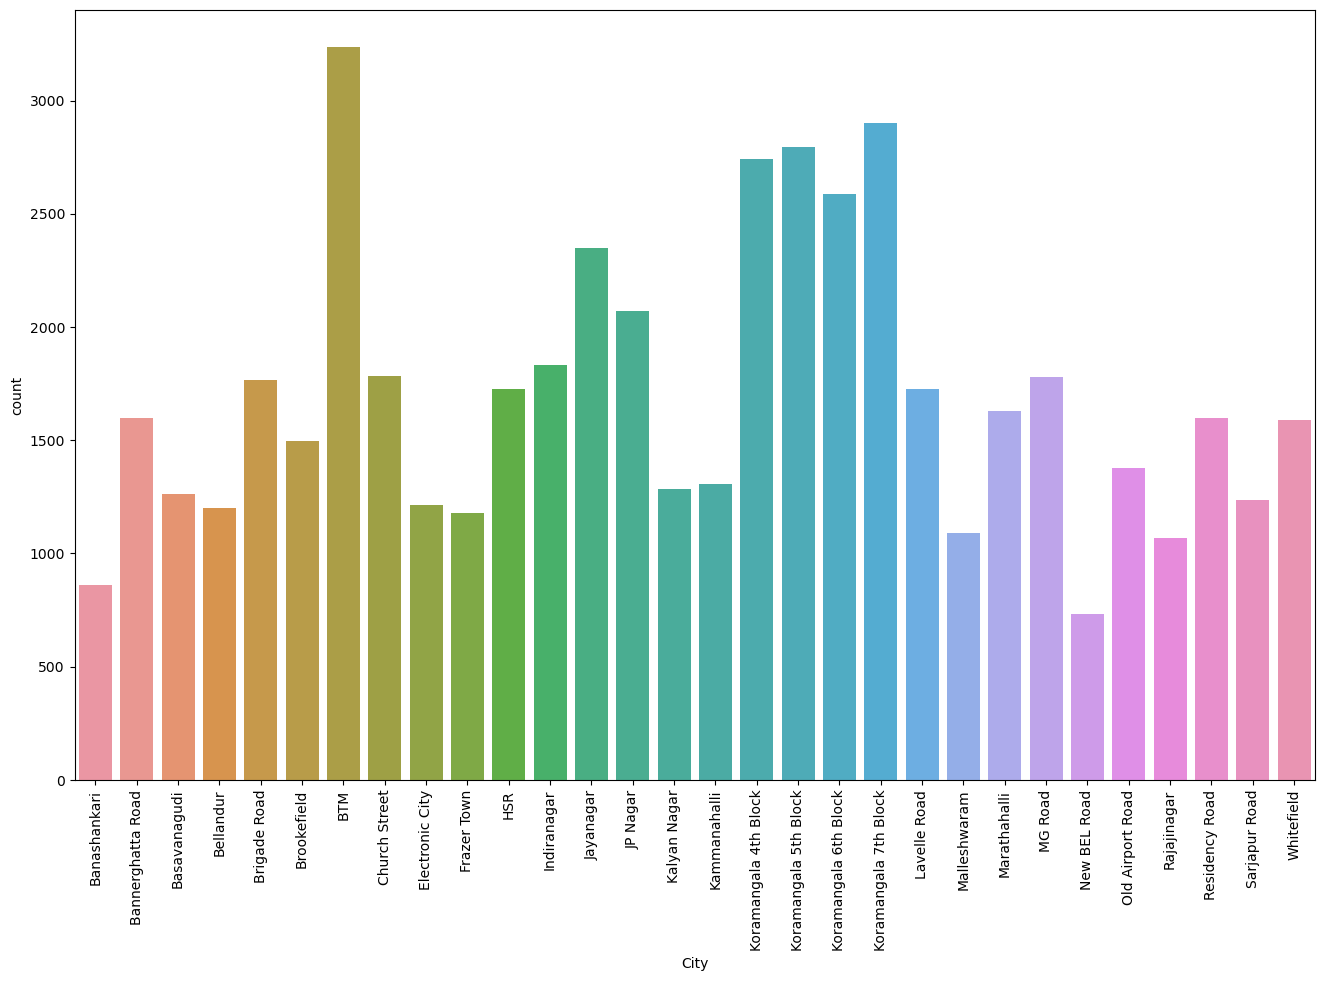

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
ax = sns.countplot(x=df1['City'])
plt.xticks(rotation=90)
plt.show()


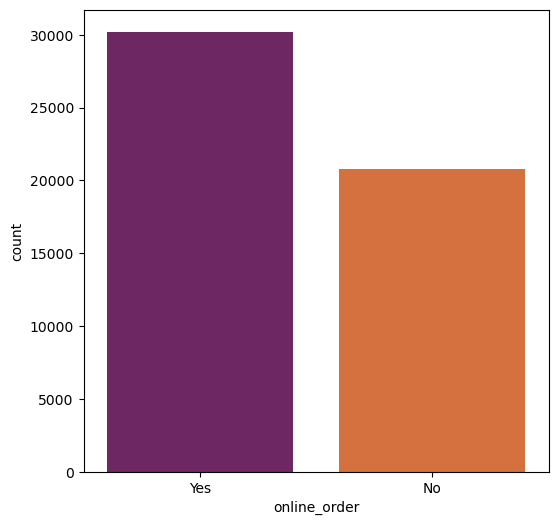

In [113]:
plt.figure(figsize=(6,6))
sns.countplot(x=df1['online_order'],palette='inferno')
plt.show()

<Axes: xlabel='book_table', ylabel='count'>

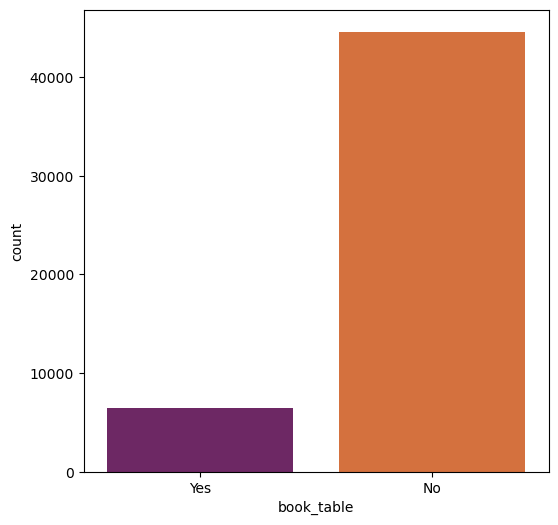

In [114]:
plt.figure(figsize=(6,6))
sns.countplot(x=df1['book_table'],palette='inferno')

<Axes: xlabel='online_order', ylabel='rate'>

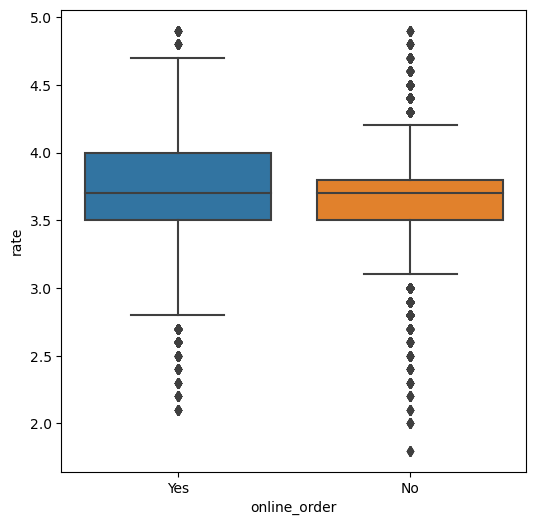

In [115]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df1)

<Axes: xlabel='book_table', ylabel='rate'>

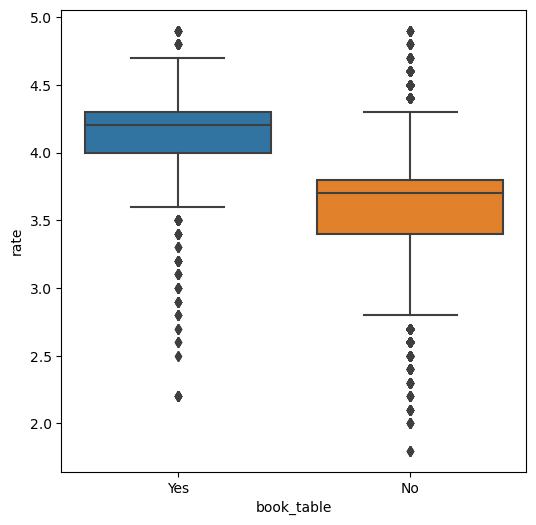

In [116]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=df1)

# Visualizing Online order facility,location wise

In [128]:
df2=df1.groupby(['City','online_order'])['name'].count()
df2.to_csv('location-online.csv')
df2=pd.read_csv('location-online.csv')
df2=pd.pivot_table(df2,values=None,index=['City'],columns=['online_order'],fill_value=0,aggfunc=np.sum)
df2

name      
online_order             No   Yes
City                             
BTM                    1129  2109
Banashankari            317   542
Bannerghatta Road       598  1002
Basavanagudi            470   794
Bellandur               393   810
Brigade Road            848   916
Brookefield             538   957
Church Street           929   856
Electronic City         657   557
Frazer Town             467   711
HSR                     545  1182
Indiranagar             772  1062
JP Nagar                743  1327
Jayanagar               772  1578
Kalyan Nagar            512   773
Kammanahalli            536   769
Koramangala 4th Block   957  1783
Koramangala 5th Block  1034  1763
Koramangala 6th Block   926  1660
Koramangala 7th Block  1109  1791
Lavelle Road            987   739
MG Road                 919   861
Malleshwaram            431   661
Marathahalli            685   944
New BEL Road            328   407
Old Airport Road        578   801
Rajajinagar             529   539
Residency Road          896   704
Sarjapur Road           465   769
Whitefield              742   847

<Axes: xlabel='City'>

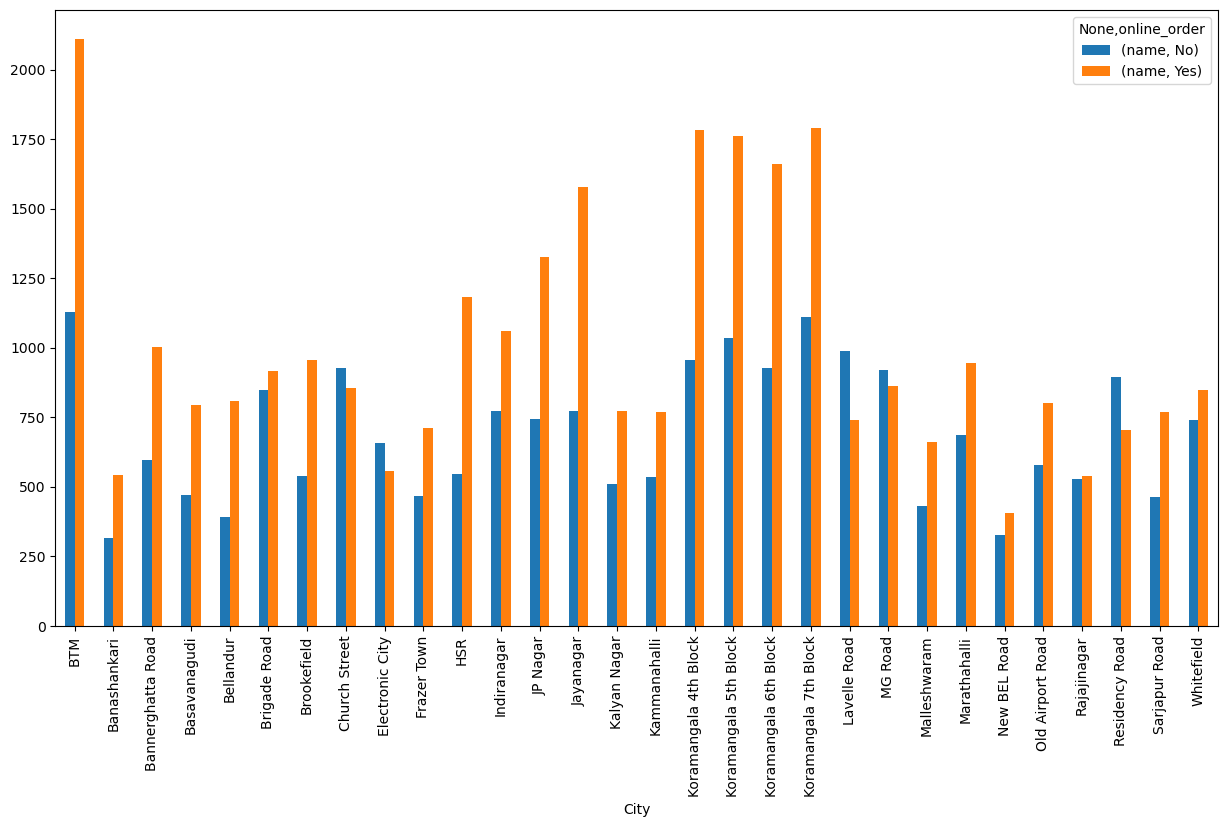

In [129]:
df2.plot(kind='bar',figsize=(15,8))

# Visulaizing through book table

In [141]:
df2=df1.groupby(['City','book_table'])['name'].count()
df2.to_csv('book-table.csv')
df2=pd.read_csv('book-table.csv')
df2=pd.pivot_table(df2,values=None,index=['City'],columns=['book_table'],fill_value=0,aggfunc=np.sum)
df2

name     
book_table               No  Yes
City                            
BTM                    2860  378
Banashankari            817   42
Bannerghatta Road      1483  117
Basavanagudi           1141  123
Bellandur              1070  133
Brigade Road           1415  349
Brookefield            1371  124
Church Street          1428  357
Electronic City        1119   95
Frazer Town            1049  129
HSR                    1548  179
Indiranagar            1502  332
JP Nagar               1880  190
Jayanagar              2096  254
Kalyan Nagar           1165  120
Kammanahalli           1197  108
Koramangala 4th Block  2374  366
Koramangala 5th Block  2437  360
Koramangala 6th Block  2257  329
Koramangala 7th Block  2521  379
Lavelle Road           1399  327
MG Road                1425  355
Malleshwaram            968  124
Marathahalli           1477  152
New BEL Road            685   50
Old Airport Road       1151  228
Rajajinagar             978   90
Residency Road         1292  308
Sarjapur Road          1106  128
Whitefield             1399  190

<Axes: xlabel='City'>

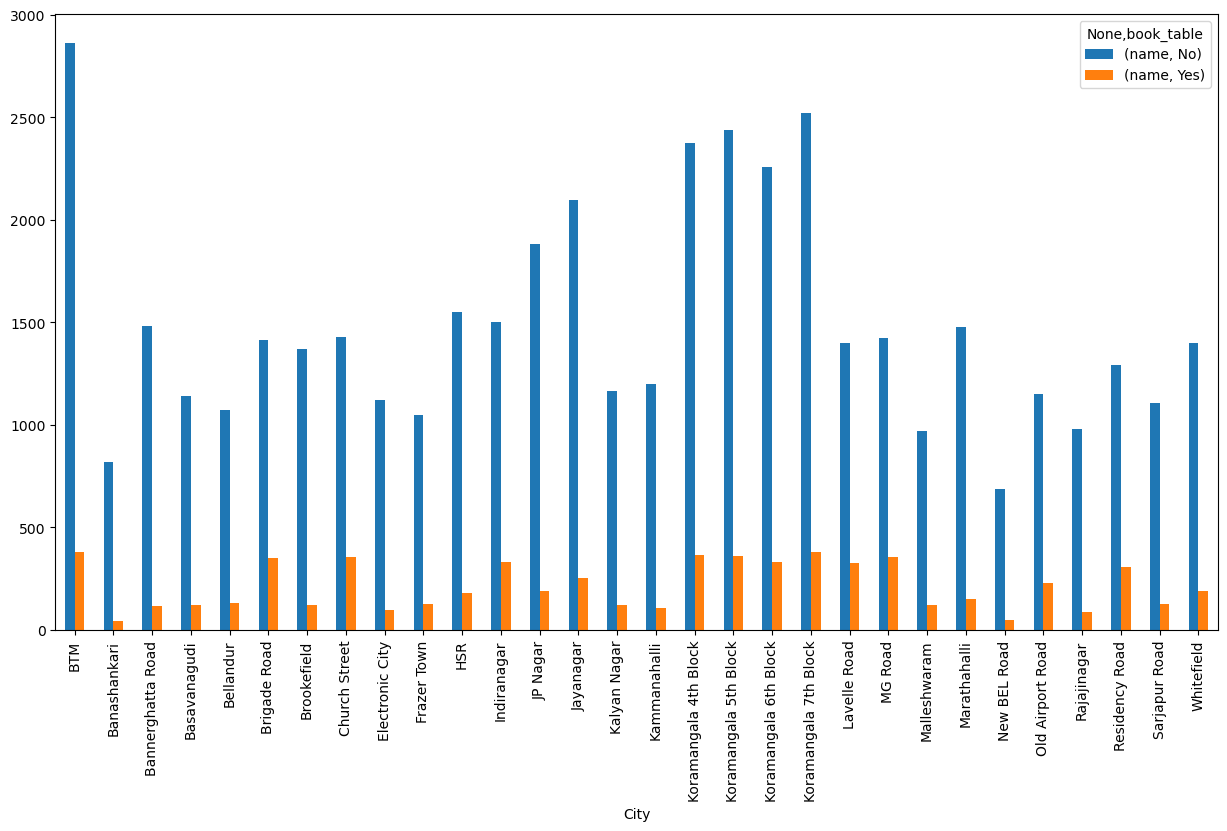

In [142]:
df2.plot(kind='bar',figsize=(15,8))

# Visulaizing types of Restaurants

<Axes: xlabel='Type', ylabel='rate'>

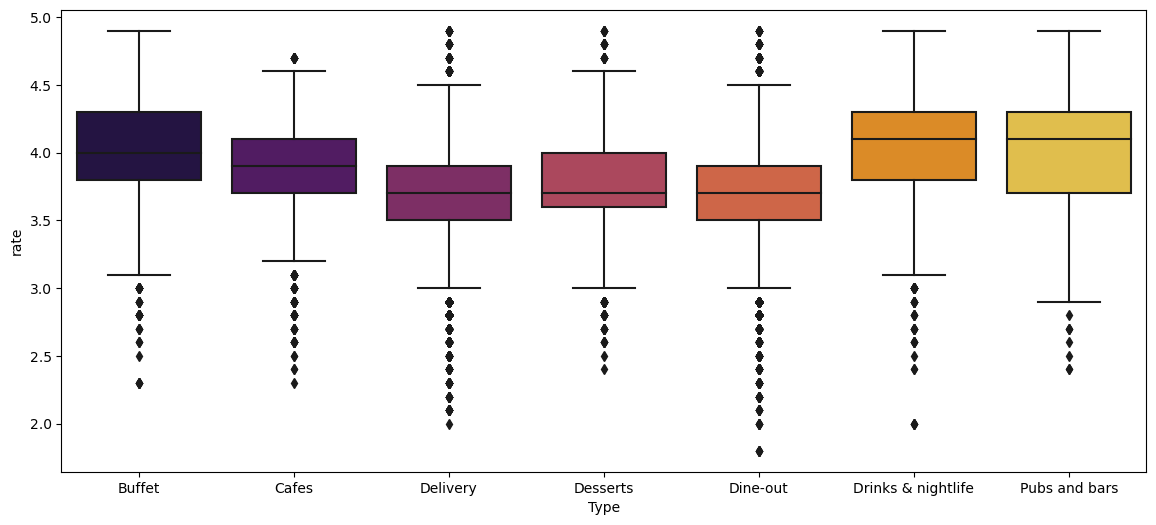

In [134]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Type',y='rate',data=df1,palette='inferno')

In [143]:
df3=df1.groupby(['City','Type'])['name'].count()
df3.to_csv('City-type.csv')
df3=pd.read_csv('City-type.csv')
df3=pd.pivot_table(df3,values=None,index=['City'],columns=['Type'],fill_value=0,aggfunc=np.sum)
# df2=pd.pivot_table(df2,values=None,index=['City'],columns=['book_table'],fill_value=0,aggfunc=np.sum)
df3


name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
City                                                            
BTM                       39    99     1768      192     1044   
Banashankari               7    24      461       59      300   
Bannerghatta Road         17    42      901      116      506   
Basavanagudi              15    46      636      109      446   
Bellandur                 28    27      655       79      380   
Brigade Road              57    83      692      134      644   
Brookefield               33    35      845       86      482   
Church Street             60    86      650      137      697   
Electronic City           22    24      554       71      501   
Frazer Town               14    46      647       87      357   
HSR                       21    48      991      113      518   
Indiranagar               38    80      839      147      616   
JP Nagar                  25    62     1133      155      672   
Jayanagar                 29    76     1358      173      691   
Kalyan Nagar              11    54      650       90      465   
Kammanahalli               0    55      668       96      470   
Koramangala 4th Block     43   106     1481      163      886   
Koramangala 5th Block     36    44     1505      175      914   
Koramangala 6th Block     34   101     1373      170      850   
Koramangala 7th Block     37   104     1507      181      948   
Lavelle Road              64    82      623      131      742   
MG Road                   54    77      725      137      641   
Malleshwaram              22    29      544       89      365   
Marathahalli              31    28      844       96      609   
New BEL Road               4    29      371       43      274   
Old Airport Road          27    50      692      104      425   
Rajajinagar               17    22      448      101      436   
Residency Road            59    76      606      129      655   
Sarjapur Road             25    30      635       82      423   
Whitefield                 0    38      767      110      603   

                                                        
Type                  Drinks & nightlife Pubs and bars  
City                                                    
BTM                                   45            51  
Banashankari                           8             0  
Bannerghatta Road                     18             0  
Basavanagudi                          12             0  
Bellandur                             17            17  
Brigade Road                          77            77  
Brookefield                           14             0  
Church Street                         79            76  
Electronic City                       21            21  
Frazer Town                           11            16  
HSR                                   14            22  
Indiranagar                           57            57  
JP Nagar                              23             0  
Jayanagar                             23             0  
Kalyan Nagar                          15             0  
Kammanahalli                          16             0  
Koramangala 4th Block                 61             0  
Koramangala 5th Block                 58            65  
Koramangala 6th Block                 58             0  
Koramangala 7th Block                 59            64  
Lavelle Road                          84             0  
MG Road                               73            73  
Malleshwaram                          23            20  
Marathahalli                          21             0  
New BEL Road                           7             7  
Old Airport Road                      39            42  
Rajajinagar                           20            24  
Residency Road                        75             0  
Sarjapur Road                         20            19  
Whitefield                            36            35

<Axes: xlabel='City'>

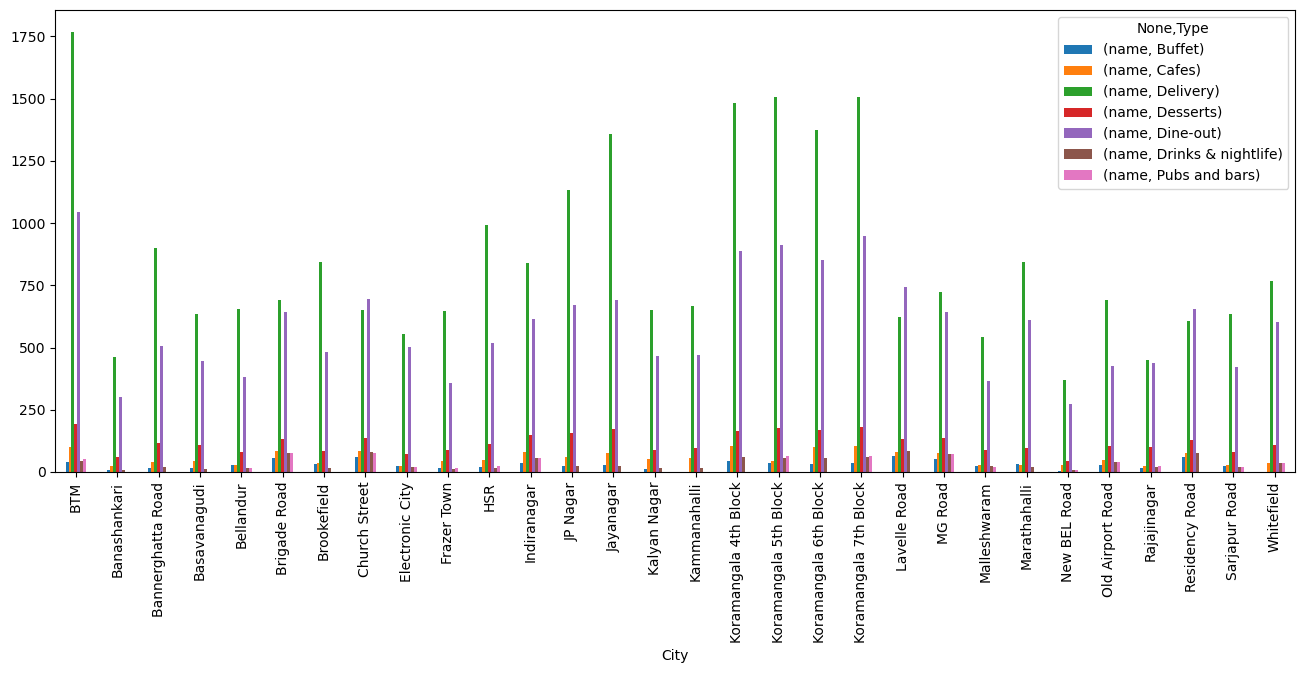

In [144]:
df3.plot(kind='bar',figsize=(16,6))

In [145]:
df4=df1[['City','votes']]
df4.drop_duplicates()
df5=df4.groupby(['City'])['votes'].sum()
df5=df5.to_frame()
df5=df5.sort_values('votes',ascending=False)
df5.head()

,votes
City,
Koramangala 7th Block,1053510
Koramangala 5th Block,1025796
Koramangala 4th Block,980358
BTM,974424
Koramangala 6th Block,966583


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Koramangala 7th Block'),
  Text(1, 0, 'Koramangala 5th Block'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'BTM'),
  Text(4, 0, 'Koramangala 6th Block'),
  Text(5, 0, 'Indiranagar'),
  Text(6, 0, 'MG Road'),
  Text(7, 0, 'Church Street'),
  Text(8, 0, 'Brigade Road'),
  Text(9, 0, 'Residency Road'),
  Text(10, 0, 'Lavelle Road'),
  Text(11, 0, 'Old Airport Road'),
  Text(12, 0, 'Jayanagar'),
  Text(13, 0, 'JP Nagar'),
  Text(14, 0, 'HSR'),
  Text(15, 0, 'Marathahalli'),
  Text(16, 0, 'Bellandur'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Sarjapur Road'),
  Text(19, 0, 'Frazer Town'),
  Text(20, 0, 'Basavanagudi'),
  Text(21, 0, 'Brookefield'),
  Text(22, 0, 'Malleshwaram'),
  Text(23, 0, 'Bannerghatta Road'),
  Text(24, 0, 'Rajajinagar'),
  Text(25, 0, 'Kalyan Nagar'),
  Text(26, 0, 'Kammanahalli'),
  Text(27, 0, 'Banashanka

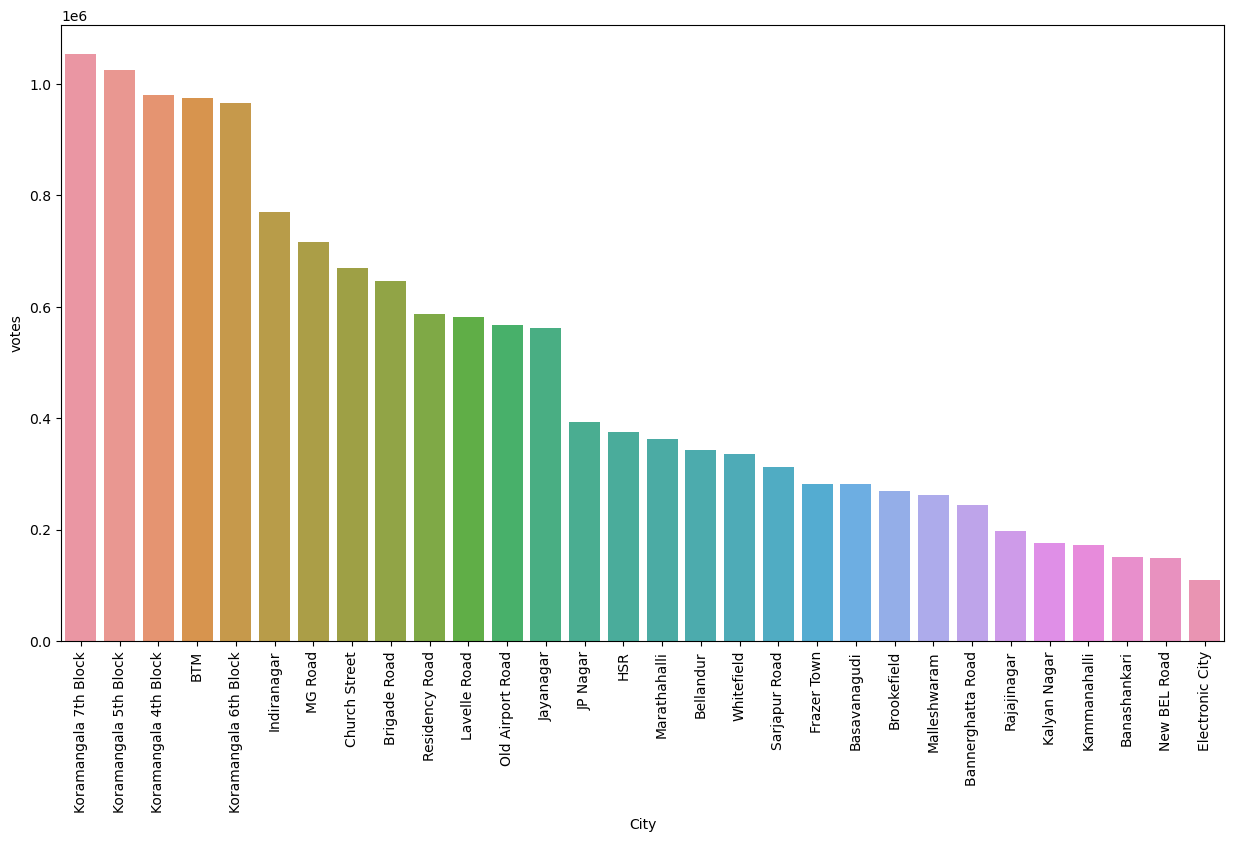

In [153]:
plt.figure(figsize=(15,8))
sns.barplot(x=df5.index,y=df5['votes'])
plt.xticks(rotation=90)

# Visualizing top cuisines

In [155]:
df6=df1[['cuisines','votes']]
df6.drop_duplicates()
df7=df.groupby(['cuisines'])['votes'].sum()
df7=df7.to_frame()
df7=df7.sort_values('votes',ascending=False)
df7.head()

,votes
cuisines,
North Indian,558654
"Pizza, Cafe, Italian",347520
"Cafe, American, Burger, Steak",301059
"North Indian, Chinese",259864
"North Indian, Mughlai, South Indian, Chinese",227930


In [156]:
df7=df7.iloc[1:,:]
df7.head()

,votes
cuisines,
"Pizza, Cafe, Italian",347520
"Cafe, American, Burger, Steak",301059
"North Indian, Chinese",259864
"North Indian, Mughlai, South Indian, Chinese",227930
South Indian,161991
